### K-Means 알고리즘
- 비슷한 샘플끼리 Centroid(군집 중심점)을 통해 형성

1. 임의의 Centroid(군집 중심점)을 설정
2. Centroid로부터 거리 계산을 통해 가까운 데이터 포인트들을 설정
3. 가장 가까운 데이터 포인트들로부터, 평균을 중심으로 Centroid를 업데이트
4. 수렴(Centroid의 이동이 없을 때)할 때까지 2~3단계 반복

- 쉽고 간결함
- 일반적인 군집화에 많이 사용됨
- 거리 기반의 알고리즘이다보니, 속성의 개수(차원의 수)가 많은 경우 군집화 정확도가 떨어진다.
- 몇개의 군집(k수)을 선택해야하는지 알수가 없음

In [1]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   --------------------------------------- 581.4/581.4 kB 11.7 MB/s eta 0:00:00


In [2]:
!pip install -U mglearn

In [3]:
import mglearn

In [4]:
import matplotlib.pyplot as plt

C:\Users\smhrd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\smhrd\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\smhrd\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


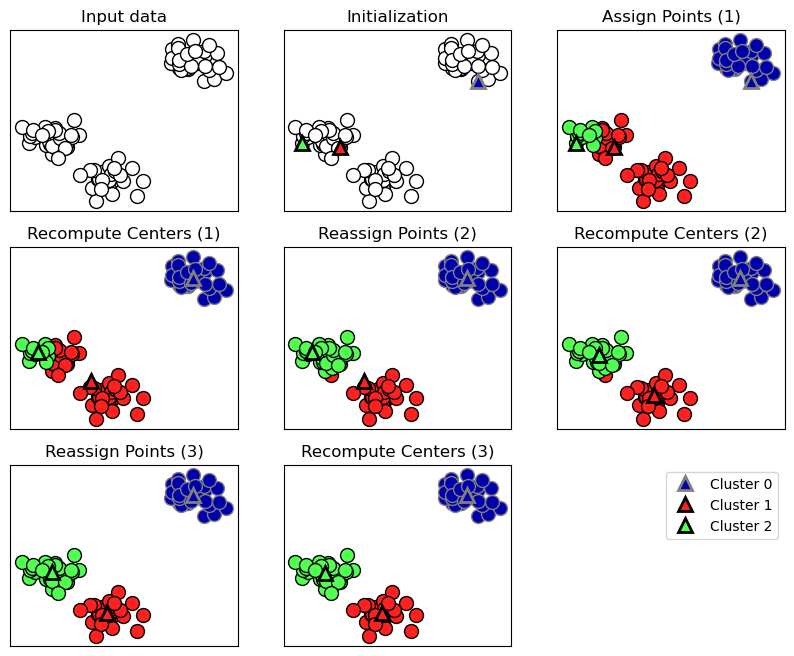

In [5]:
mglearn.plots.plot_kmeans_algorithm()
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')

- 알고리즘이 클러스터 중심으로 삼을 데이터 포인트(Centroid) 3개를 무작위로 지정
  - 할당된 포인트의 평균값으로 클러스터 중심(Centroid)를 업데이트 (반복)
  - 클러스터 중심에 할당되는 데이터 포인트의 변화가 없을 때까지 반복

In [7]:
import numpy as np
import pandas as pd

In [8]:
from sklearn.datasets import load_iris # 붓꽃 데이터셋

In [9]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
# X(문제데이터) 생성
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# y(정답데이터) 생성 -> 클러스터링 후 비교를 위해 별도로 빼놓기
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [18]:
# 2차원으로 시각화하기 위해 2개의 특징만 사용
feature = data[['sepal length (cm)','sepal width (cm)']]
feature.head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [19]:
from sklearn.cluster import KMeans # K-평균 클러스터링 알고리즘

In [20]:
# 모델 초기화(생성)
model = KMeans(
    n_clusters = 3, # 클러스터 개수(k수) 설정
    algorithm='lloyd',
    # 로이드 알고리즘, 기본값
    n_init = 10, # 초기 중심점을 무작위로 선택하는 횟수 -> 그중 가장 좋은 결과를 선택
    random_state = 2025
)

In [21]:
# 학습
model.fit(feature)

KMeans(n_clusters=3, n_init=10, random_state=2025)

In [22]:
# 예측
pred = model.predict(feature)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [26]:
# 예측한 컬럼을 feature에 합치기
pred_df = pd.DataFrame(pred, columns=['predict'])
df = pd.concat([feature, pred_df], axis = 1)
df

,sepal length (cm),sepal width (cm),predict
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


In [ ]:
# 교차표 : 두 열의 값들이 각각 몇번 나타나는지 카운팅

In [29]:
# df['predict'] # 모델이 군집화 예측
# labels['labels'] # 실제 값
# 두개의 열을 교차표

ct = pd.crosstab( labels['labels'], df['predict'] )
ct

# 해석 : 실제값 0인 데이터 포인트를 예측 레이블 0으로 50개 모두 분류했다!
# labels의 0 과, 클러스터 0 은 다른의미

predict,0,1,2
labels,,,
0,50,0,0
1,0,12,38
2,0,35,15


In [30]:
# Centroid 확인
model.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [31]:
centers = pd.DataFrame(model.cluster_centers_, columns= feature.columns)
centers

,sepal length (cm),sepal width (cm)
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


In [32]:
df['predict'].value_counts()

predict
2    53
0    50
1    47
Name: count, dtype: int64

In [36]:
centers

,sepal length (cm),sepal width (cm)
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


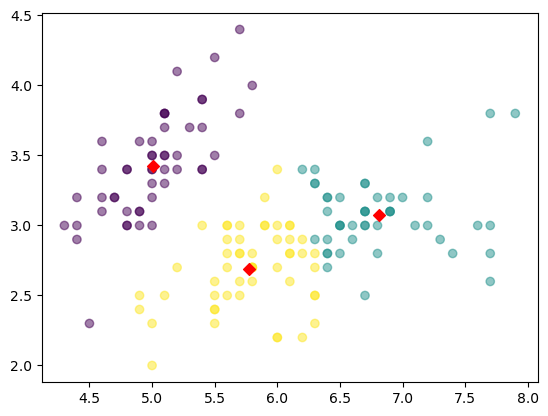

In [37]:
# 데이터 포인트들을 Centroid와 함께 시각화
plt.scatter(
    df['sepal length (cm)'], # x축 좌표 설정
    df['sepal width (cm)'], # y축 좌표 설정
    c = df['predict'], # 예측 된 군집 레이블에 따라 색상을 다르게
    alpha = 0.5 # 투명도
)

# Centroid의 좌표
center_x = centers['sepal length (cm)']
center_y = centers['sepal width (cm)']

# Centroid 시각화
plt.scatter(center_x, center_y, marker = 'D', c = 'r')

plt.show()

- 군집화가 어느 정도 효율적으로 잘 되었는지를 평가할 수 있는 지표들이 별도로 존재함
  - 지도학습(ex분류)과 비지도학습의 평가지표 다름
  - 클러스터링의 경우 같은 클러스터에 같은 포인트가 들어있는지, 다른 클러스터 간에 다른 포인트가 들어가 있는지가 중요!
  - 비지도 학습 특성 상, 어떠한 지표 값이라도 정확하게 성능을 평가하기는 어려움

### 비지도 학습 평가 지표 - ARI

- 실제 라벨(또는 다른 비지도 예측 레이블)이 필요함!
- Rand index(RI) : 가능한 모든 쌍의 경우에 대해 정답인 쌍의 개수를 비율로
- ARI : RI의 기댓값을 RI값에서 빼서, 기댓값과 분산을 재조정 (-1 ~ 1)

In [39]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
# AMI : ARI 비슷한 지표(두 클러스터링 결과 간의 유사성 측정)
# MI를 보정한 지표

# ARI : 각 일치하는 쌍의 비율
# AMI : 두 클러스터링에서 겹치는 정보의 비율

In [40]:
# 예측한 라벨값 확인
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [41]:
model.predict(feature)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [43]:
# ARI
adjusted_rand_score(labels['labels'], model.labels_)

0.6006861021484542

In [45]:
# AMI
adjusted_mutual_info_score(labels['labels'], model.labels_)

np.float64(0.6422873687639806)

In [ ]:
# 둘 다 0.6 정도 근사치로, 실제값과 어느정도 일치하기는 하나, 완벽하지는 않다고 해석됨

- 대부분의 군집화 데이터 set는 ARI나 AMI처럼 비교할만한 실제 레이블을 가지고 있지 않음.
- 실제 레이블 값이 있으면, 지도 학습 모델을 만들기에, 비지도 학습 모델에 적합하다고 볼 수는 없음.
- ARI나 AMI의 경우에는 성능평가보다는, 알고리즘을 개발하거나 특정 프로세스에서 사용된다.

### 비지도 학습 평가지표 - Silhouette analysis(실루엣 분석)

- 실루엣 계수 : 클러스터링이 잘되었는지 확인할 수 있는 지표(-1 ~ 1)
  - 1에 가까움 : 잘 분리되어 있음
  - 0에 가까움 : 클러스터의 경계
  - -1에 가까움 : 이 데이터 포인트는 잘못 군집화 되어있다.

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_samples : 각 데이터 포인트의 실루엣 계수를 계산해주는 도구
# silhouette_score : 전체 데이터에 대한 평균 실루엣 계수를 계산해주는 도구

In [47]:
# 평균 실루엣 확인
silhouette_score(feature, pred)

np.float64(0.4450525692083638)

In [48]:
silhouette_vals = silhouette_samples(feature, pred)
silhouette_vals

array([0.59821502, 0.40612542, 0.56116222, 0.50873385, 0.62315302,
       0.45565352, 0.5864484 , 0.60869183, 0.39425208, 0.48741484,
       0.45148528, 0.61919956, 0.44125142, 0.42414742, 0.23521458,
       0.29133554, 0.45565352, 0.59821502, 0.25359469, 0.57981119,
       0.33465369, 0.59433196, 0.58646285, 0.52470289, 0.61919956,
       0.34535262, 0.60869183, 0.54753336, 0.51296915, 0.56116222,
       0.50989532, 0.33465369, 0.4870954 , 0.37999471, 0.48741484,
       0.51365274, 0.29548011, 0.62716096, 0.43998322, 0.57293064,
       0.62529499, 0.05305997, 0.50523725, 0.62529499, 0.57981119,
       0.44125142, 0.57981119, 0.54777875, 0.5128406 , 0.57052151,
       0.61662244, 0.35479484, 0.62536195, 0.51897012, 0.2972364 ,
       0.59856472, 0.23926834, 0.10278049, 0.46667301, 0.19579235,
       0.2528595 , 0.48310025, 0.45291149, 0.34331071, 0.47853986,
       0.58878984, 0.39231911, 0.63790498, 0.32691737, 0.59001846,
       0.33949542, 0.39510251, 0.2127447 , 0.39510251, 0.22420

In [50]:
df_sil = pd.concat([df, pd.Series(silhouette_vals, name = 'silhouette_coef')], axis=1)

df_sil

,sepal length (cm),sepal width (cm),predict,silhouette_coef
0,5.1,3.5,0,0.598215
1,4.9,3.0,0,0.406125
2,4.7,3.2,0,0.561162
3,4.6,3.1,0,0.508734
4,5.0,3.6,0,0.623153
...,...,...,...,...
145,6.7,3.0,1,0.570192
146,6.3,2.5,2,0.212745
147,6.5,3.0,1,0.426061
148,6.2,3.4,1,0.122212


In [51]:
# 각 클러스터별 실루엣 계수의 평균값
df_sil.groupby('predict')['silhouette_coef'].mean()

# 어떠한 레이블 상관없이, 실루엣 계수가 낮음

predict
0    0.490080
1    0.442581
2    0.404766
Name: silhouette_coef, dtype: float64

### 최적의 클러스터의 수 결정
- 엘보우 기법
- SSE(클러스터 내 데이터 포인트들이 클러스터 중심으로부터 얼마나 떨어져 있는지를 나타내는 값)가 가장 완만해지는 k수를 찾기

In [53]:
# SSE : 군집화 한 이후에, 각 중심점에서 데이터 포인트간의 거리의 제곱을 합산
model.inertia_

37.05070212765957

In [55]:
# 엘보우 그리기
# 군집 개수 범위 설정
ks = range(1,10) # 군집개수 k (1~9)
inertias = [] # SSE를 담아줄 리스트

for k in range(1,10):
    model = KMeans(
        n_clusters= k, # 군집개수 1~9로 설정
        n_init = 10, # 초기 중심점을 무작위로 선택하는 횟수
        random_state=2025
    )
    # 각각의 군집 개수로 학습
    model.fit(feature)
    inertias.append(model.inertia_)

In [56]:
inertias

[130.47526666666667,
 58.20409278906672,
 37.05070212765957,
 28.034982153246226,
 21.097615578332668,
 17.363261904761902,
 14.779739232032338,
 12.893248709623713,
 10.992803571428574]

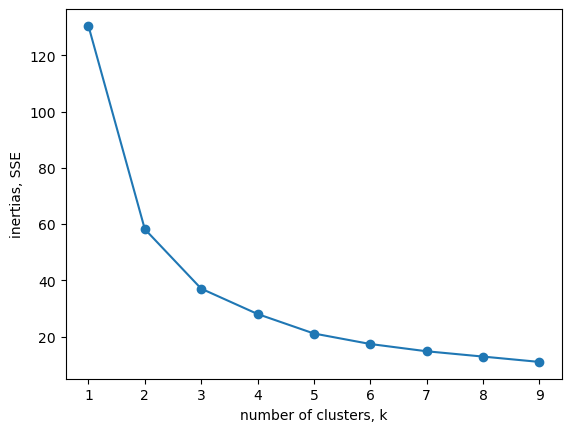

In [57]:
# 군집 개수에 따른 시각화
plt.plot(ks, inertias, marker = 'o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertias, SSE')

plt.show()

- 클러스터의 수가 3일 때, 그래프의 기울기가 크게 완만해짐을 관측
- k=3일때, 급격한 감소가 멈추고, 그 이후로는 더 많은 클러스터를 추가하더라도 SSE가 크게 감소하지 않는다.
- 3이 가장 합리적인 군집 개수라고 볼 수 있다.